In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2022-01-20"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-01-20   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7416   Ìï¥Ïö¥ÎåÄÍµ¨  13425   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2022-01-20     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6829   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2022-01-20     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11148   Ìï¥Ïö¥ÎåÄÍµ¨  13692   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2022-01-20     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3450   Ìï¥Ïö¥ÎåÄÍµ¨   4980   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2022-01-20    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5980   Ìï¥Ïö¥ÎåÄÍµ¨   8223   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2022-01-20     ÎåÄÌåå                      1.0„éè   2643   Ìï¥Ïö¥ÎåÄÍµ¨   2990   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2022-01-20   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9900   Ìï¥Ïö¥ÎåÄÍµ¨  18450   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2022-01-20     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Ìï¥Ïö¥ÎåÄÍµ¨   5620   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2022-01-20     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736   Ìï¥Ïö¥ÎåÄÍµ¨    736   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2022-01-20     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410   Ìï¥Ïö¥ÎåÄÍµ¨   1650   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2022-01-20      Î¨¥                   2.0„éè 1Í∞ú   1500   Ìï¥Ïö¥ÎåÄÍµ¨   2483   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2022-01-20    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3880   Ìï¥Ïö¥ÎåÄÍµ¨   4090   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2022-01-20     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3630   Ìï¥Ïö¥ÎåÄÍµ¨   4681   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2022-01-20      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  31952   Ìï¥Ïö¥ÎåÄÍµ¨  37684   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2022-01-20     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2370   Ìï¥Ïö¥ÎåÄÍµ¨   3261   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2022-01-20  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3383   Ìï¥Ïö¥ÎåÄÍµ¨   3733   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2022-01-20   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14980   Ìï¥Ïö¥ÎåÄÍµ¨  14980   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2022-01-20     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  11538   Ìï¥Ïö¥ÎåÄÍµ¨  25361   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2022-01-20    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2566   Ìï¥Ïö¥ÎåÄÍµ¨   2680   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2022-01-20     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1780   Ìï¥Ïö¥ÎåÄÍµ¨   1790   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2022-01-20     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1280   Ìï¥Ïö¥ÎåÄÍµ¨   1310   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2022-01-20    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44500   Ìï¥Ïö¥ÎåÄÍµ¨  92950   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2022-01-20    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5580   Ìï¥Ïö¥ÎåÄÍµ¨   8180   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2022-01-20      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  50800   Ìï¥Ïö¥ÎåÄÍµ¨  53900   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2022-01-20     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1353   Ìï¥Ïö¥ÎåÄÍµ¨   2493   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2022-01-20    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5772   Ìï¥Ïö¥ÎåÄÍµ¨  11000   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2022-01-20     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    860   Ìï¥Ïö¥ÎåÄÍµ¨    880   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2022-01-20    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7980   Ìï¥Ïö¥ÎåÄÍµ¨   9290   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2022-01-20   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2225   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2022-01-20     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2780   Ìï¥Ïö¥ÎåÄÍµ¨   4140   Ìï¥Ïö¥ÎåÄÍµ¨   
30  2022-01-20    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  10453   Ìï¥Ïö¥ÎåÄÍµ¨  26040   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    6009   81.03%   9,672  
1     421    6.16%   7,020  
2    2544   22.82%  12,724  
3    1530   44.35%   4,143  
4    2243   37.51%   7,028  
5     347   13.13%   2,851  
6    8550   86.36%  13,083  
7     426     8.2%   5,336  
8       0     0.0%     736  
9     240   17.02%   1,500  
10    983   65.53%   1,874  
11    210    5.41%   3,957  
12   1051   28.95%   

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2022-04-21"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-04-21   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6583   Ìï¥Ïö¥ÎåÄÍµ¨   8925   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2022-04-21     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6829   Ìï¥Ïö¥ÎåÄÍµ¨   7780   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2022-04-21     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   7611   Ìï¥Ïö¥ÎåÄÍµ¨  18000   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2022-04-21    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   6818   Ìï¥Ïö¥ÎåÄÍµ¨  11588   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2022-04-21     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3690   Ìï¥Ïö¥ÎåÄÍµ¨   3980   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2022-04-21    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6900   Ìï¥Ïö¥ÎåÄÍµ¨  10612   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2022-04-21     ÎåÄÌåå                      1.0„éè   2265   Ìï¥Ïö¥ÎåÄÍµ¨   3040   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2022-04-21   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  11250   Ìï¥Ïö¥ÎåÄÍµ¨  14950   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2022-04-21     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Ìï¥Ïö¥ÎåÄÍµ¨   5620   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2022-04-21     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736   Ìï¥Ïö¥ÎåÄÍµ¨    736   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2022-04-21     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550   Ìï¥Ïö¥ÎåÄÍµ¨   1810   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2022-04-21      Î¨¥                   2.0„éè 1Í∞ú   1327   Ìï¥Ïö¥ÎåÄÍµ¨   2983   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2022-04-21    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3880   Ìï¥Ïö¥ÎåÄÍµ¨   4450   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2022-04-21      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  29984   Ìï¥Ïö¥ÎåÄÍµ¨  37065   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2022-04-21     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2394   Ìï¥Ïö¥ÎåÄÍµ¨   4115   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2022-04-21  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3733   Ìï¥Ïö¥ÎåÄÍµ¨   6300   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2022-04-21   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13000   Ìï¥Ïö¥ÎåÄÍµ¨  14980   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2022-04-21     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12254   Ìï¥Ïö¥ÎåÄÍµ¨  29976   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2022-04-21    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316   Ìï¥Ïö¥ÎåÄÍµ¨   2890   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2022-04-21     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1780   Ìï¥Ïö¥ÎåÄÍµ¨   1780   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2022-04-21     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380   Ìï¥Ïö¥ÎåÄÍµ¨   1400   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2022-04-21    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6980   Ìï¥Ïö¥ÎåÄÍµ¨   9200   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2022-04-21      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49800   Ìï¥Ïö¥ÎåÄÍµ¨  50900   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2022-04-21     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1763   Ìï¥Ïö¥ÎåÄÍµ¨   2368   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2022-04-21    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5837   Ìï¥Ïö¥ÎåÄÍµ¨  13333   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2022-04-21     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    860   Ìï¥Ïö¥ÎåÄÍµ¨    880   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2022-04-21    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8750   Ìï¥Ïö¥ÎåÄÍµ¨   9290   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2022-04-21   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2225   Ìï¥Ïö¥ÎåÄÍµ¨   2730   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2022-04-21     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2840   Ìï¥Ïö¥ÎåÄÍµ¨   4140   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2022-04-21    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   8026   Ìï¥Ïö¥ÎåÄÍµ¨  27906   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    2342   35.58%   7,407  
1     951   13.93%   7,186  
2   10389   136.5%  12,386  
3    4770   69.96%   8,823  
4     290    7.86%   3,840  
5    3712    53.8%   8,497  
6     775   34.22%   2,765  
7    3700   32.89%  13,317  
8     426     8.2%   5,336  
9       0     0.0%     736  
10    260   16.77%   1,647  
11   1656  124.79%   1,974  
12    570   14.69%   4,077  
13   7081   23.62%  33,987  
14   1721   71.89%   3,436  
15   2567   68.77%   4,616  
16   1980   

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2022-07-21"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-07-21   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7416   Ìï¥Ïö¥ÎåÄÍµ¨  14850   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2022-07-21     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6146   Ìï¥Ïö¥ÎåÄÍµ¨   7000   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2022-07-21     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  10429   Ìï¥Ïö¥ÎåÄÍµ¨  20000   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2022-07-21    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4328   Ìï¥Ïö¥ÎåÄÍµ¨   7258   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2022-07-21     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3690   Ìï¥Ïö¥ÎåÄÍµ¨   4000   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2022-07-21    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5980   Ìï¥Ïö¥ÎåÄÍµ¨  10612   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2022-07-21     ÎåÄÌåå                      1.0„éè   2260   Ìï¥Ïö¥ÎåÄÍµ¨   3790   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2022-07-21   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12250   Ìï¥Ïö¥ÎåÄÍµ¨  23950   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2022-07-21     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4398   Ìï¥Ïö¥ÎåÄÍµ¨   5620   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2022-07-21     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736   Ìï¥Ïö¥ÎåÄÍµ¨    736   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2022-07-21     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550   Ìï¥Ïö¥ÎåÄÍµ¨   1810   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2022-07-21      Î¨¥                   2.0„éè 1Í∞ú   2846   Ìï¥Ïö¥ÎåÄÍµ¨   4238   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2022-07-21    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4458   Ìï¥Ïö¥ÎåÄÍµ¨   4600   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2022-07-21     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7140   Ìï¥Ïö¥ÎåÄÍµ¨  16237   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2022-07-21     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   4276   Ìï¥Ïö¥ÎåÄÍµ¨   7346   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2022-07-21  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3814   Ìï¥Ïö¥ÎåÄÍµ¨   6300   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2022-07-21   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14980   Ìï¥Ïö¥ÎåÄÍµ¨  14980   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2022-07-21     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  18180   Ìï¥Ïö¥ÎåÄÍµ¨  32284   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2022-07-21    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649   Ìï¥Ïö¥ÎåÄÍµ¨   2890   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2022-07-21     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1950   Ìï¥Ïö¥ÎåÄÍµ¨   1980   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2022-07-21     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380   Ìï¥Ïö¥ÎåÄÍµ¨   1400   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2022-07-21    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  40750   Ìï¥Ïö¥ÎåÄÍµ¨  92950   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2022-07-21    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7670   Ìï¥Ïö¥ÎåÄÍµ¨   9200   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2022-07-21      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  43800   Ìï¥Ïö¥ÎåÄÍµ¨  54900   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2022-07-21     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1943   Ìï¥Ïö¥ÎåÄÍµ¨   2993   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2022-07-21    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7932   Ìï¥Ïö¥ÎåÄÍµ¨  10937   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2022-07-21     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    860   Ìï¥Ïö¥ÎåÄÍµ¨    880   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2022-07-21    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7560   Ìï¥Ïö¥ÎåÄÍµ¨   9290   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2022-07-21   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2225   Ìï¥Ïö¥ÎåÄÍµ¨   2730   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2022-07-21     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2580   Ìï¥Ïö¥ÎåÄÍµ¨   4380   Ìï¥Ïö¥ÎåÄÍµ¨   
30  2022-07-21    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   8400   Ìï¥Ïö¥ÎåÄÍµ¨  31100   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    7434  100.24%  10,397  
1     854    13.9%   6,495  
2    9571   91.77%  16,030  
3    2930    67.7%   5,385  
4     310     8.4%   3,890  
5    4632   77.46%   8,524  
6    1530    67.7%   2,989  
7   11700   95.51%  16,533  
8    1222   27.79%   5,071  
9       0     0.0%     736  
10    260   16.77%   1,647  
11   1392   48.91%   3,689  
12    142    3.19

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2022-10-20"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-10-20   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8250   Ìï¥Ïö¥ÎåÄÍµ¨  14850   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2022-10-20     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6146   Ìï¥Ïö¥ÎåÄÍµ¨   7000   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2022-10-20     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  14594   Ìï¥Ïö¥ÎåÄÍµ¨  19565   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2022-10-20    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4208   Ìï¥Ïö¥ÎåÄÍµ¨   6238   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2022-10-20     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3690   Ìï¥Ïö¥ÎåÄÍµ¨   3980   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2022-10-20     ÎåÄÌåå                      1.0„éè   3160   Ìï¥Ïö¥ÎåÄÍµ¨   4544   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2022-10-20   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  11750   Ìï¥Ïö¥ÎåÄÍµ¨  19950   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2022-10-20     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4962   Ìï¥Ïö¥ÎåÄÍµ¨   5620   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2022-10-20     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    820   Ìï¥Ïö¥ÎåÄÍµ¨    820   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2022-10-20     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550   Ìï¥Ïö¥ÎåÄÍµ¨   1810   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2022-10-20      Î¨¥                   2.0„éè 1Í∞ú   3000   Ìï¥Ïö¥ÎåÄÍµ¨   3991   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2022-10-20    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4458   Ìï¥Ïö¥ÎåÄÍµ¨   4600   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2022-10-20     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2347   Ìï¥Ïö¥ÎåÄÍµ¨   8327   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2022-10-20      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  13003   Ìï¥Ïö¥ÎåÄÍµ¨  40825   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2022-10-20     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   4919   Ìï¥Ïö¥ÎåÄÍµ¨   6783   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2022-10-20  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4083   Ìï¥Ïö¥ÎåÄÍµ¨   7629   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2022-10-20   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14980   Ìï¥Ïö¥ÎåÄÍµ¨  14980   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2022-10-20     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14389   Ìï¥Ïö¥ÎåÄÍµ¨  29975   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2022-10-20    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1549   Ìï¥Ïö¥ÎåÄÍµ¨   2890   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2022-10-20     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1950   Ìï¥Ïö¥ÎåÄÍµ¨   1980   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2022-10-20     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380   Ìï¥Ïö¥ÎåÄÍµ¨   1400   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2022-10-20    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  40750   Ìï¥Ïö¥ÎåÄÍµ¨  92950   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2022-10-20    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8480   Ìï¥Ïö¥ÎåÄÍµ¨   8480   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2022-10-20      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  45800   Ìï¥Ïö¥ÎåÄÍµ¨  53900   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2022-10-20     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2522   Ìï¥Ïö¥ÎåÄÍµ¨   3118   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2022-10-20    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5532   Ìï¥Ïö¥ÎåÄÍµ¨  12454   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2022-10-20     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    860   Ìï¥Ïö¥ÎåÄÍµ¨    880   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2022-10-20    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6660   Ìï¥Ïö¥ÎåÄÍµ¨   9600   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2022-10-20   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2225   Ìï¥Ïö¥ÎåÄÍµ¨   2730   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2022-10-20     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3680   Ìï¥Ïö¥ÎåÄÍµ¨   4380   Ìï¥Ïö¥ÎåÄÍµ¨   
30  2022-10-20    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12382   Ìï¥Ïö¥ÎåÄÍµ¨  35100   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    6600    80.0%  10,675  
1     854    13.9%   6,495  
2    4971   34.06%  17,509  
3    2030   48.24%   5,073  
4     290    7.86%   3,823  
5    1384    43.8%   3,791  
6    8200   69.79%  15,200  
7     658   13.26%   5,259  
8       0     0.0%     820  
9     260   16.77%   1,647  
10    991   33.03%   3,589  
11    142    3.19%   4,546  
12   5980  254.79

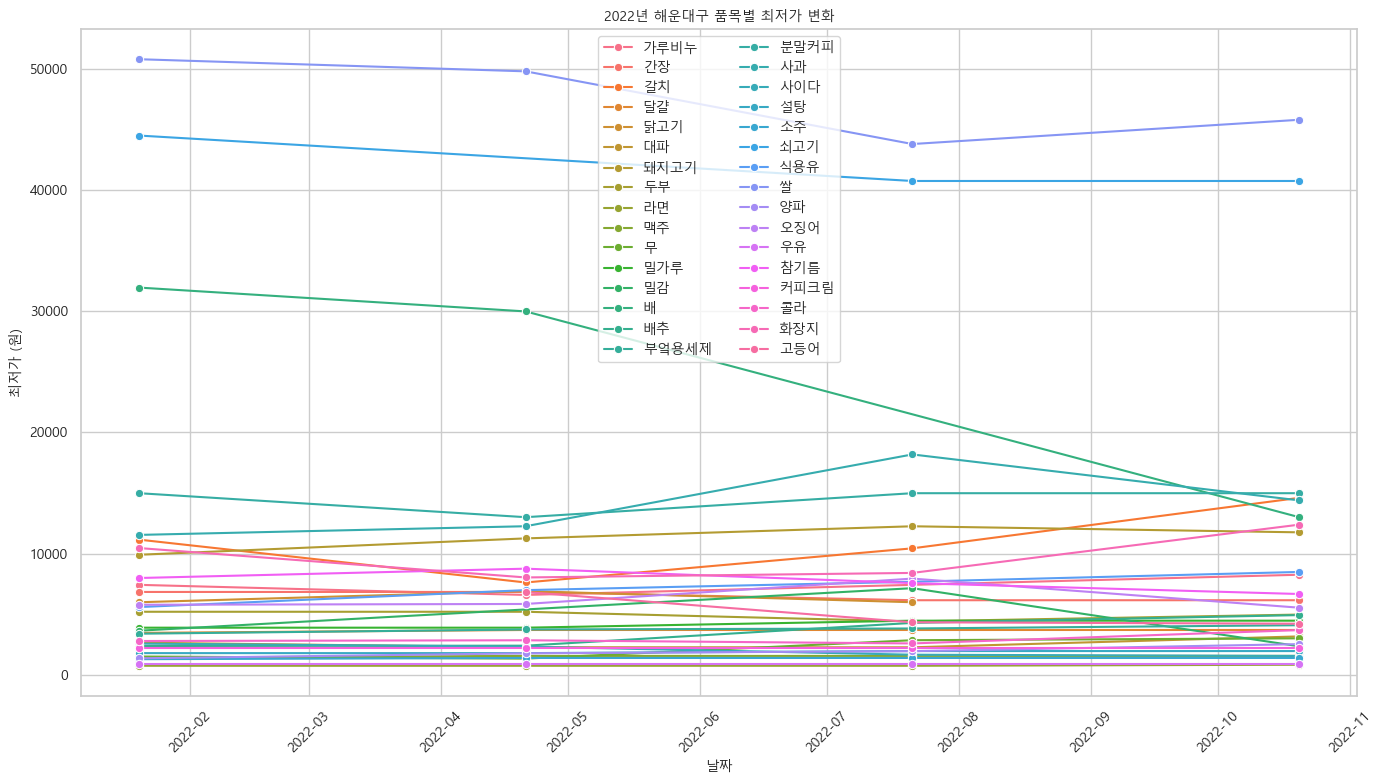

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_1q.csv")
q2 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_2q.csv")
q3 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_3q.csv")
q4 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2022ÎÖÑ Ìï¥Ïö¥ÎåÄÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_min.csv", index=False, encoding="utf-8-sig")

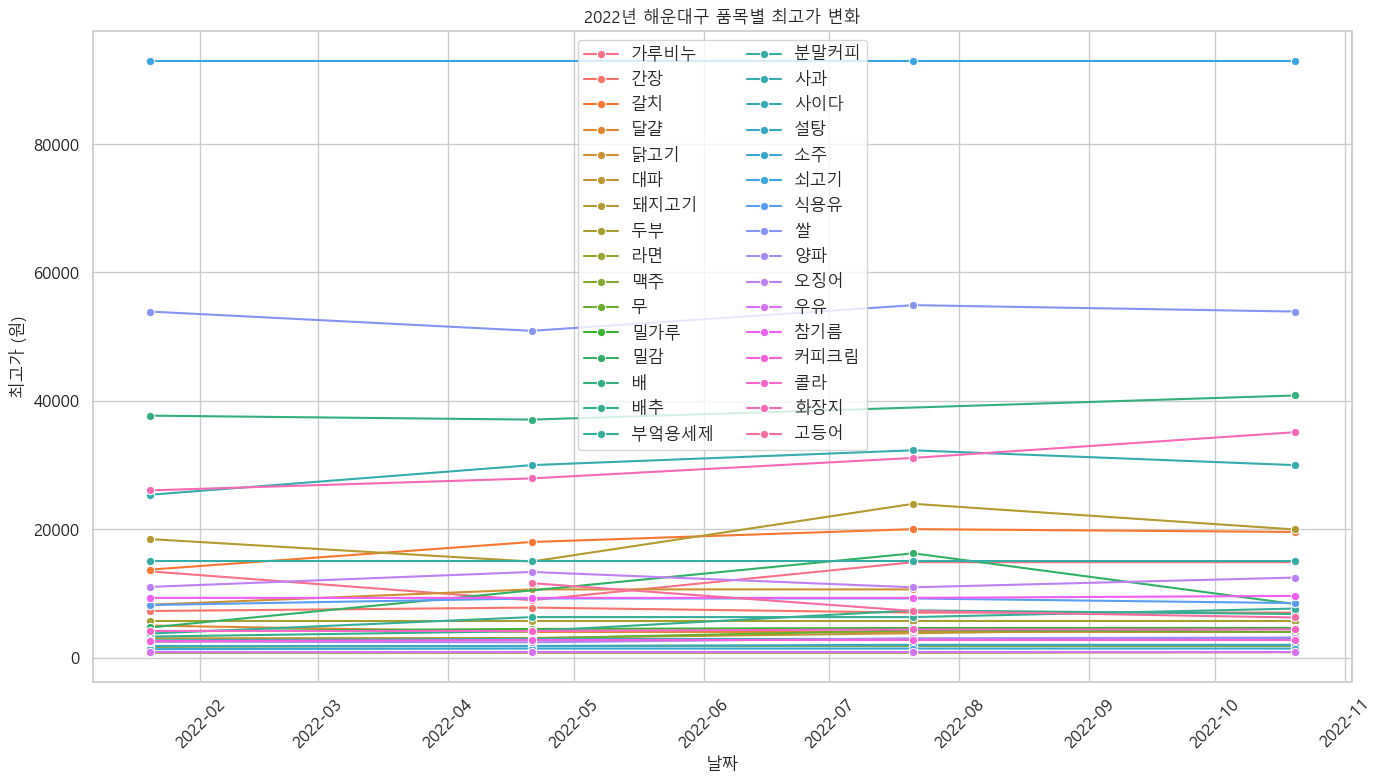

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_1q.csv")
q2 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_2q.csv")
q3 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_3q.csv")
q4 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2022ÎÖÑ Ìï¥Ïö¥ÎåÄÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2022_max.csv", index=False, encoding="utf-8-sig")